<a href="https://colab.research.google.com/github/abhinavdayal/EIP_Session3/blob/master/Attempt08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, SeparableConv2D, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Flatten, Dense
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 

TensorFlow 2.x selected.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
train_features.shape

Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
num_train, img_rows, img_cols, img_channels  =  train_features.shape
num_test, _, _, _ =  test_features.shape
labels = np.unique(train_labels)
num_classes = len(labels)
print(num_classes)

10


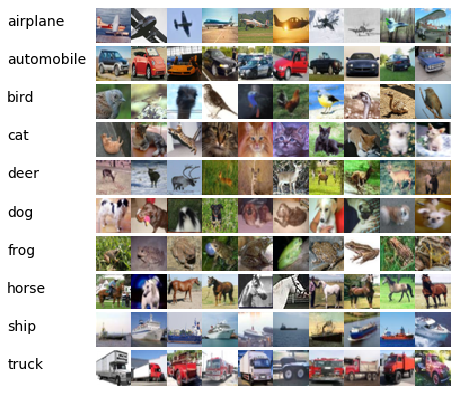

In [4]:
# display 10 images from each category. 
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
r, c = 10, 11
fig = plt.figure(figsize=(7,7))
fig.subplots_adjust(hspace=0.01, wspace=0.01)
for i in range(num_classes):
    idx = np.random.choice(np.where(train_labels[:]==i)[0], 10, replace=False)
    ax = plt.subplot(r, c, i*c+1)
    ax.text(-1.5, 0.5, class_names[i], fontsize=14)
    plt.axis('off')
    for j in range(1, 11):
      plt.subplot(r, c, i*c+j+1)
      plt.imshow(train_features[idx[j-1]], interpolation='none')
      plt.axis('off')
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [13]:
# Define the model, Since image size is already small we wont use stride > 1.
# we have to use only separatble convolution
model = keras.Sequential()

# rin=1, nin = 32x32, cin= 3, jin=1, k=3, p=1, s=1, jout=1, rout=3, nout=32x32, cout=16
model.add(SeparableConv2D(filters=16, kernel_size=(3, 3), padding='same', depth_multiplier=1, input_shape=(32, 32, 3), use_bias=False))
model.add(Dropout(0.08))
model.add(BatchNormalization())
model.add(Activation('relu'))

# rin=3, nin = 32x32, cin=16, jin=1, k=3, p=1, s=1, jout=1, rout=5, nout=32x32, cout=32
model.add(SeparableConv2D(filters=16, kernel_size=(3, 3), padding='same', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.08))
model.add(BatchNormalization())
model.add(Activation('relu'))

# rin=5, nin = 32x32, cin=32, jin=1, k=3, p=1, s=1, jout=1, rout=7, nout=32x32, cout=48
model.add(SeparableConv2D(filters=32, kernel_size=(3, 3), padding='same', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.08))
model.add(BatchNormalization())
model.add(Activation('relu'))

# rin=5, nin = 32x32, cin=32, jin=1, k=3, p=1, s=1, jout=1, rout=9, nout=32x32, cout=48
model.add(SeparableConv2D(filters=48, kernel_size=(3, 3), padding='same', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.08))
model.add(BatchNormalization())
model.add(Activation('relu'))


# rin=8, nin = 16x16, cin= 48, jin=2, k=3, p=1, s=1, jout=2, rout=11, nout=16x16, cout=64
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.08))
model.add(BatchNormalization())
model.add(Activation('relu'))

# rin=16, nin = 16x16, cin=96, jin=1, k=2, p=1, s=2, jout=2, rout=12, nout=8x8, cout=96
model.add(MaxPooling2D())

# rin=12, nin = 16x16, cin= 64, jin=2, k=3, p=1, s=1, jout=2, rout=16, nout=16x16, cout=96
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.08))
model.add(BatchNormalization())
model.add(Activation('relu'))

# rin=12, nin = 16x16, cin= 64, jin=2, k=3, p=1, s=1, jout=2, rout=20, nout=16x16, cout=96
model.add(SeparableConv2D(filters=96, kernel_size=(3, 3), padding='same', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.08))
model.add(BatchNormalization())
model.add(Activation('relu'))

# rin=18, nin = 8x8, cin= 96, jin=4, k=3, p=1, s=1, jout=4, rout=24, nout=6x6, cout=128
model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), padding='valid', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.08))
model.add(BatchNormalization())
model.add(Activation('relu'))

# rin=18, nin = 8x8, cin= 96, jin=4, k=3, p=1, s=1, jout=4, rout=28, nout=6x6, cout=128
model.add(SeparableConv2D(filters=192, kernel_size=(3, 3), padding='valid', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.08))
model.add(BatchNormalization())
model.add(Activation('relu'))


# rin=26, nin = 6x6, cin= 128, jin=4, k=3, p=1, s=1, jout=4, rout=32, nout=4x4, cout=10 Cfar_10 has 10 classes
model.add(SeparableConv2D(filters=num_classes, kernel_size=(3, 3), padding='valid', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.08))
model.add(BatchNormalization())
model.add(Activation('relu'))

# output size = 1x1x10
model.add(GlobalAveragePooling2D())
model.add(Flatten()) # 10x1
model.add(Activation('softmax')) # get probabilities

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_38 (Separab (None, 32, 32, 16)        75        
_________________________________________________________________
dropout_38 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
activation_42 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
separable_conv2d_39 (Separab (None, 32, 32, 16)        400       
_________________________________________________________________
dropout_39 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_39 (Batc (None, 32, 32, 16)       

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    #rotation_range=10,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #horizontal_flip=True,
    zoom_range=0)

#datagen.fit(train_features)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 steps_per_epoch = (train_features.shape[0]//128), epochs = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))


Epoch 1/50
390/390 [==============================] - 49s 125ms/step - loss: 1.6837 - accuracy: 0.4460 - val_loss: 2.4688 - val_accuracy: 0.1013
Epoch 2/50
390/390 [==============================] - 45s 115ms/step - loss: 1.3143 - accuracy: 0.5804 - val_loss: 1.2833 - val_accuracy: 0.5642
Epoch 3/50
390/390 [==============================] - 45s 115ms/step - loss: 1.1236 - accuracy: 0.6427 - val_loss: 1.1132 - val_accuracy: 0.6290
Epoch 4/50
390/390 [==============================] - 45s 115ms/step - loss: 0.9945 - accuracy: 0.6798 - val_loss: 1.3326 - val_accuracy: 0.5555
Epoch 5/50
390/390 [==============================] - 46s 117ms/step - loss: 0.9036 - accuracy: 0.7085 - val_loss: 0.8910 - val_accuracy: 0.7021
Epoch 6/50
390/390 [==============================] - 45s 114ms/step - loss: 0.8309 - accuracy: 0.7328 - val_loss: 0.9656 - val_accuracy: 0.6782
Epoch 7/50
390/390 [==============================] - 45s 114ms/step - loss: 0.7754 - accuracy: 0.7481 - val_loss: 0.9190 - val_ac

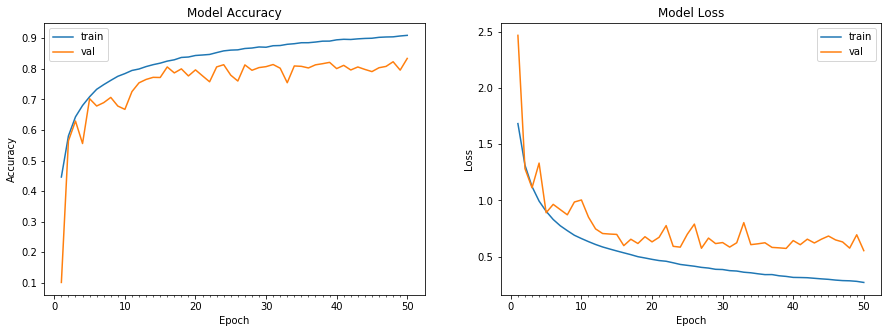

Accuracy on test data is: 83.37


In [15]:
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))